In [43]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
boston_houses = pd.read_csv('housing.csv', delimiter="\s+", header=None, names=column_names)
boston_houses

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [18]:
boston_houses.isna().mean()  # média de colunas missing

boston_houses['CHAS'] = boston_houses['CHAS'].map({1: 'yes', 2: 'no'})

In [19]:
target = "MEDV"
numerical_columns = [col for col in boston_houses.columns if boston_houses[col].dtypes in ['int64', 'float64'] and boston_houses[col].name != target]
categorical_columns = [col for col in boston_houses.columns if boston_houses[col].dtypes == 'object' and boston_houses[col].name != target]

In [30]:
X = boston_houses[numerical_columns + categorical_columns]
y = boston_houses[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
])

cat_pipeline = Pipeline([
    ('OH', OneHotEncoder()),
    ('impute', SimpleImputer(strategy='most_frequent'))
])

column_transform = ColumnTransformer([
    ('cat_transform', num_pipeline, numerical_columns),
    ('num_transform', cat_pipeline, categorical_columns),
])

In [44]:
# conseguimos, no final de tudo, criar um pipeline que vai englobar tudo isso

final_pipeline = Pipeline([
    ("preprocessor", column_transform),
    ("feature_selection", SelectKBest(score_func=f_regression, k=10)),
    ("model", LinearRegression())
])

In [42]:
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

In [45]:
print(f"MSE: {mean_squared_error(y_pred, y_test)}")

MSE: 25.315306329469216


In [48]:
import matplotlib.pyplot as plt

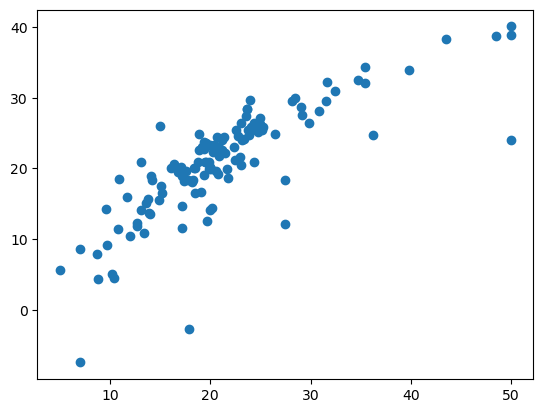

In [50]:
_ = plt.scatter(y_test, y_pred)